# MATPLOTLIB with New York AIRBNB data. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
air =pd.read_csv('Data/Airbnb_NYC.csv')

In [3]:
air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


###	Chart of the number of rooms of each type by municipalities

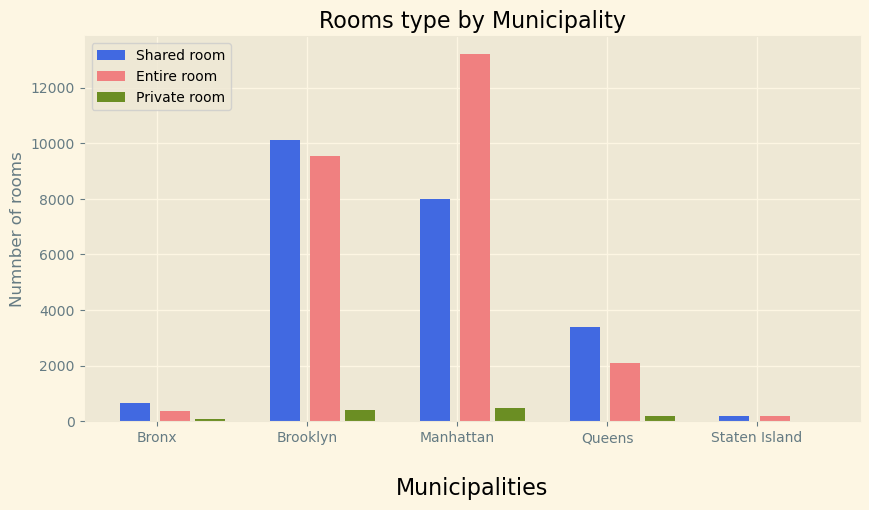

In [4]:
plt.style.use('Solarize_Light2')
muni = sorted(air.neighbourhood_group.unique())
sha= air[air.room_type=='Shared room'].neighbourhood_group.value_counts()[muni].tolist()
ent= air[air.room_type=='Entire home/apt'].neighbourhood_group.value_counts()[muni].tolist()
pri= air[air.room_type=='Private room'].neighbourhood_group.value_counts()[muni].tolist()

x= range(len(muni))

plt.figure(figsize=(10, 5))
plt.bar([i-0.15 for i in x], pri, width=0.2, color ='royalblue', label='Shared room')
plt.bar([i+0.12 for i in x], ent, width=0.2, color ='lightcoral', label='Entire room')
plt.bar([i+0.35 for i in x], sha, width=0.2, color = 'olivedrab', label='Private room')

plt.xticks(x, muni)
plt.title('Rooms type by Municipality')
plt.xlabel('\nMunicipalities', fontsize=16, color='black')
plt.ylabel('Numnber of rooms')
plt.legend(loc='upper left')


plt.show()

### Reviews by municipality

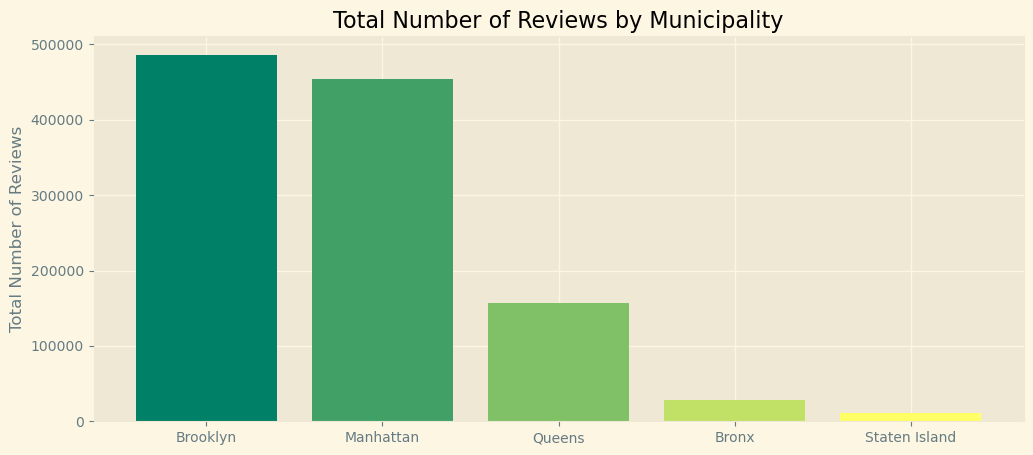

In [5]:
import matplotlib.cm as cm
munis= air.neighbourhood_group.unique()
dicti={}
for muni in munis:
    dicti[muni]= air[air.neighbourhood_group == muni].number_of_reviews.sum()

plt.figure(figsize=(12,5))
dicti_sort = dict(sorted(dicti.items(), key=lambda item: item[1], reverse=True))
# set colors from colormaps
colors = cm.summer(np.linspace(0, 1, len(dicti_sort)))

plt.bar(dicti_sort.keys(), dicti_sort.values(),color=colors , width=0.8)
#plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews by Municipality')
plt.show()


### Number of 'Entire home/apt'/Private/Shared for each Municipality

In [6]:
data=air.groupby(['room_type','neighbourhood_group']).size().unstack()
set_order = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
data =data.reindex(set_order, axis=1)
data

neighbourhood_group,Manhattan,Bronx,Brooklyn,Queens,Staten Island
room_type,,,,,
Entire home/apt,13199,379,9559,2096,176
Private room,7982,652,10132,3372,188
Shared room,480,60,413,198,9


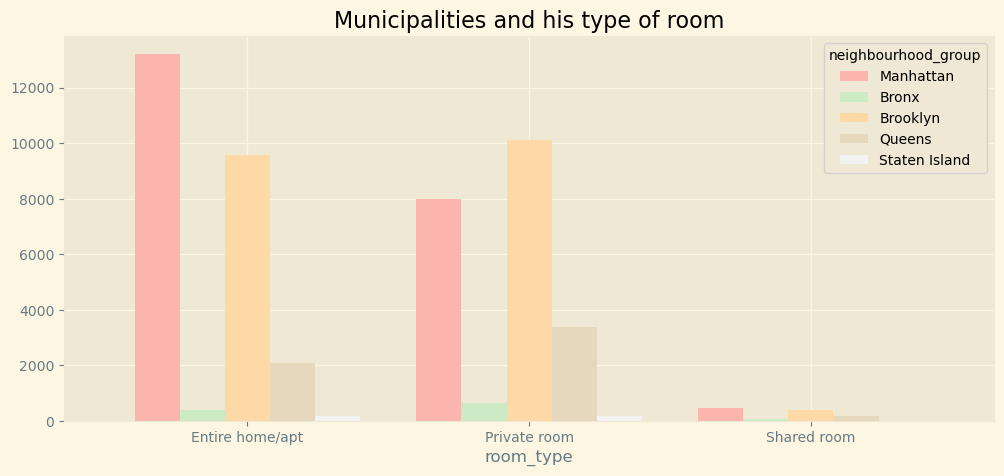

In [7]:
fig , ax = plt.subplots(figsize=(12,5))
plt.style.use('fast')

data.plot(kind='bar', ax=ax,colormap='Pastel1', width=0.8)
plt.title('Municipalities and his type of room')
plt.xticks(rotation=0)
plt.show()

### Amount of Reviews from each municipality according to the type room

In [8]:
datas= air.groupby(['neighbourhood_group','room_type']).number_of_reviews.sum().unstack()
datas

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


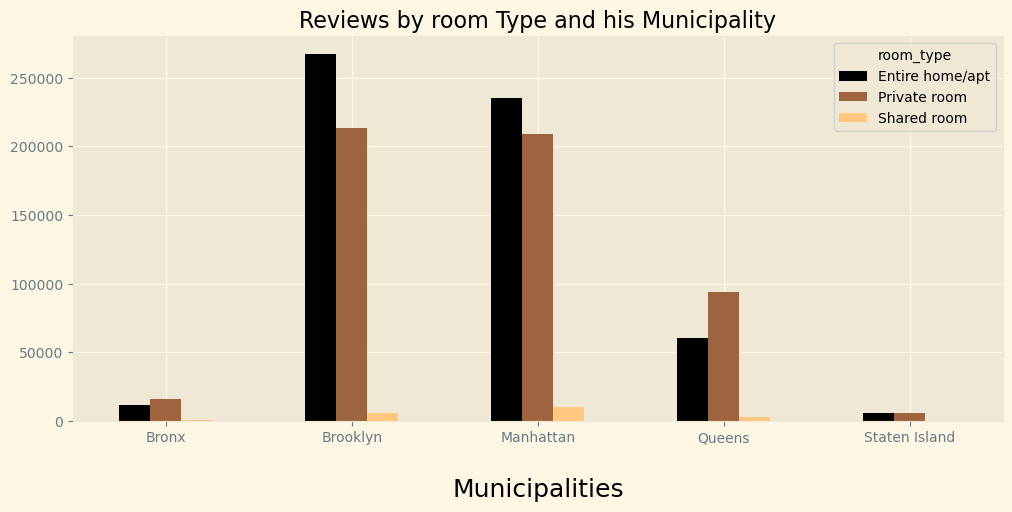

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
datas.plot(kind='bar', ax=ax, colormap= 'copper')

plt.xlabel('\nMunicipalities', fontsize=18, color='black')
plt.title('Reviews by room Type and his Municipality')
plt.xticks(rotation=0)
plt.show()

### Boxplot with the price per type room of each municipality (and same boxplot with prince <= 500>)

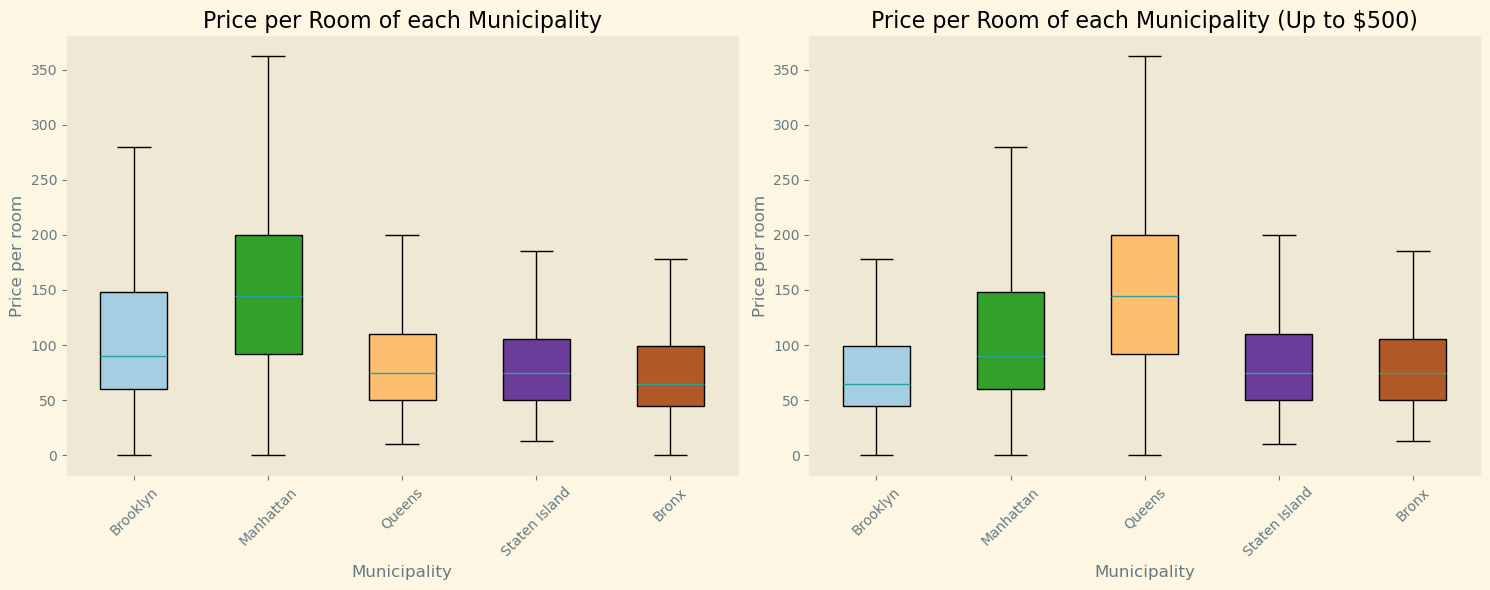

In [12]:

# Filter
preciosxmuni500 = air.groupby('neighbourhood_group')['price'].apply(lambda x: x[x <= 500].values)

# Colormap creation
colors = cm.Paired(np.linspace(0, 1, len(munis)))
das= air[['neighbourhood_group', 'price']]
munis= das.neighbourhood_group.unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Fisrt subplot: All prices
preciosxmuni =[]
for muni in munis:
    res = das[(das['neighbourhood_group']== muni) & (das['price']<=500)]['price']
    preciosxmuni.append(res)
box1 = axes[0].boxplot(preciosxmuni, labels=munis, patch_artist=True, showfliers=False)
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
axes[0].set_xlabel('Municipality')
axes[0].set_ylabel('Price per room')
axes[0].set_title('Price per Room of each Municipality')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(False)

# Second subplot: Equal or less than $500
box2 = axes[1].boxplot(preciosxmuni500, labels=munis, patch_artist=True, showfliers=False)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

axes[1].set_xlabel('Municipality')
axes[1].set_ylabel('Price per room')
axes[1].set_title('Price per Room of each Municipality (Up to $500)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(False)

plt.tight_layout()
plt.show()
